Validation Metrics - Random Forest:
Accuracy: 0.7273
Precision: 0.8000
Recall: 0.6667
F1-Score: 0.7273
Log-Loss: 0.4935

Test Metrics - Random Forest:
Accuracy: 0.9091
Precision: 1.0000
Recall: 0.8000
F1-Score: 0.8889
Log-Loss: 0.2499


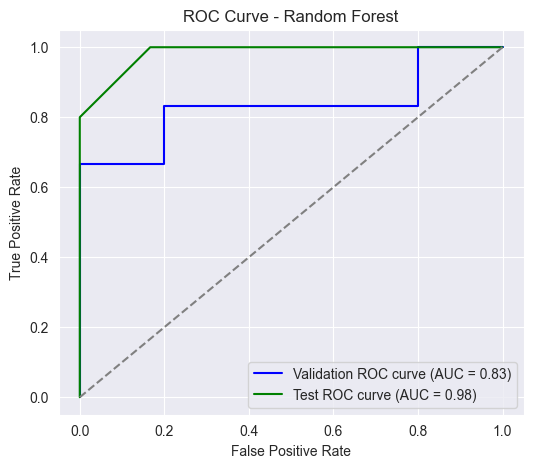

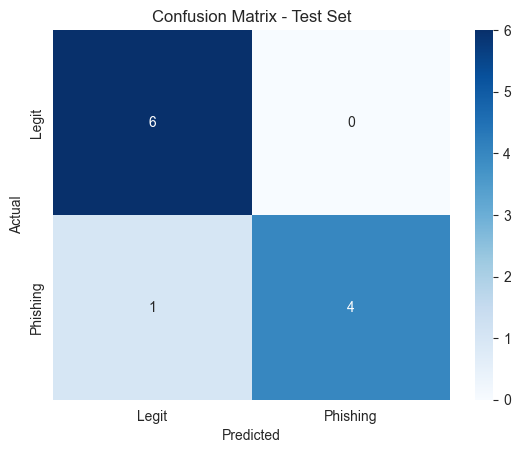

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Daten laden.
data = pd.read_csv(r'C:\Users\krenn\PycharmProjects\Phishing_DetectionRF_XGBoost\datasets_phishing\Deduplicated_Sorted_Dataset.csv', delimiter=';')

# Datensatz aufteilen
train, temp = train_test_split(data, test_size=0.2, random_state=42, stratify=data['is_phishing'])
val, test = train_test_split(temp, test_size=0.5, random_state=42, stratify=temp['is_phishing'])

# Features und Zielvariablen definieren
X_train = train.drop(columns=['is_phishing', 'url'])
y_train = train['is_phishing']
X_val = val.drop(columns=['is_phishing', 'url'])
y_val = val['is_phishing']
X_test = test.drop(columns=['is_phishing', 'url'])
y_test = test['is_phishing']

# Random Forest Modell ohne Hyperparameteroptimierung
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Validierungsvorhersagen
y_val_pred = rf_model.predict(X_val)
y_val_proba = rf_model.predict_proba(X_val)[:, 1]

# Validierungsmetriken berechnen
accuracy_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)
log_loss_val = log_loss(y_val, y_val_proba)

print("Validation Metrics - Random Forest:")
print(f"Accuracy: {accuracy_val:.4f}")
print(f"Precision: {precision_val:.4f}")
print(f"Recall: {recall_val:.4f}")
print(f"F1-Score: {f1_val:.4f}")
print(f"Log-Loss: {log_loss_val:.4f}")

# Testvorhersagen
y_test_pred = rf_model.predict(X_test)
y_test_proba = rf_model.predict_proba(X_test)[:, 1]

# Testmetriken berechnen
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
log_loss_test = log_loss(y_test, y_test_proba)

print("\nTest Metrics - Random Forest:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1-Score: {f1_test:.4f}")
print(f"Log-Loss: {log_loss_test:.4f}")

# ROC-Kurve für Testset
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# ROC-Kurve für Validierungsset
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_proba)
roc_auc_val = auc(fpr_val, tpr_val)

# Plot der ROC-Kurven für Validierungs- und Testset
plt.figure(figsize=(6, 5))
plt.plot(fpr_val, tpr_val, label=f'Validation ROC curve (AUC = {roc_auc_val:.2f})', color='blue')
plt.plot(fpr, tpr, label=f'Test ROC curve (AUC = {roc_auc:.2f})', color='green')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

# Konfusionsmatrix für Testset
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Phishing'], yticklabels=['Legit', 'Phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set')
plt.show()
